Investigation on a URL database to develop a DGA classification system using ML.
---

A machine learning tool using Python and scikit-learn that can identify URLs based on [Domain Generator Algorithms (DGA)](https://blog.malwarebytes.com/security-world/2016/12/explained-domain-generating-algorithm/), widely used by command and control malware to avoid static IP blocking. 
The following 3 classifiers for study:

- `clf = LogisticRegression(random_state=42)`
- `clf = RandomForestClassifier(max_depth=100, random_state=42)`
- `clf = MLPClassifier(random_state=42, max_iter=300)`
---

# Data Processing Tool

## Importing the libraries

In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

from collections import Counter
from timeit import timeit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.sequence import pad_sequences

## Importing the dataset

In [2]:
data_file = 'dga-24000.csv'

In [3]:
# Load in the data set as required
data_path = './'
df = pd.read_csv(data_path + data_file)
df

,Domain,Family
0,google.com,benign
1,facebook.com,benign
2,youtube.com,benign
3,twitter.com,benign
4,instagram.com,benign
...,...,...
23995,fhyibfwhpahb.su,locky
23996,nlgusntqeqixnqyo.org,locky
23997,awwduqqrjxttmn.su,locky
23998,ccxmwif.pl,locky


### Extract top-level domains (TLD)

In [4]:
import tldextract
df['Domain_Name']= [tldextract.extract(d).domain for d in df['Domain']]

                                                                                                            (Ragulin, 2022)

In [5]:
df.head()

,Domain,Family,Domain_Name
0,google.com,benign,google
1,facebook.com,benign,facebook
2,youtube.com,benign,youtube
3,twitter.com,benign,twitter
4,instagram.com,benign,instagram


The last section of a domain name, or the component that comes after the "dot" sign, is known as the top-level domain (TLD). 
It is necessary to clean the dataset from undesired characters By extract the TLD. 

### Seprate the Dependent and Independent Variables

In [6]:
X,y = df['Domain'], df['Family']
print(X)

0                  google.com
1                facebook.com
2                 youtube.com
3                 twitter.com
4               instagram.com
                 ...         
23995         fhyibfwhpahb.su
23996    nlgusntqeqixnqyo.org
23997       awwduqqrjxttmn.su
23998              ccxmwif.pl
23999     yhrryqjimvgfbqrv.pw
Name: Domain, Length: 24000, dtype: object


                                                                                                         (Ragulin, 2022)

In [7]:
print (y)

0        benign
1        benign
2        benign
3        benign
4        benign
          ...  
23995     locky
23996     locky
23997     locky
23998     locky
23999     locky
Name: Family, Length: 24000, dtype: object


###  Encoding (Converting the categorical data into numbers)

In [8]:
label_encoder = LabelEncoder()
print(df['Family'].unique())
df['Family']=label_encoder.fit_transform(df['Family'])
print(df['Family'].unique())

['benign' 'banjori' 'rovnix' 'tinba' 'pykspa_v1' 'simda' 'flubot' 'ramnit'
 'gameover' 'ranbyus' 'mydoom' 'virut' 'murofet' 'necurs' 'shiotob'
 'emotet' 'ngioweb' 'qakbot' 'symmi' 'necro' 'shifu' 'suppobox' 'qadars'
 'locky']
[ 1  0 16 22 11 19  3 14  4 15  7 23  6  9 18  2 10 13 21  8 17 20 12  5]


                                                                                                        (Ragulin, 2022)

###  Assign a number for each possible character in the domains and determine the maximum domain length

In [9]:
validChars = {x:idx + 1 for idx, x in enumerate(set(''.join(X)))}
maxFeature = len(validChars)+1
maxlen = np.max([len(x) for x in X])

                                                                                                        (Ragulin, 2022)

### Encode each domain and build a testing and evaluating dataset

In [10]:
X  = [[validChars[y] for y in x] for x in X]
X = pad_sequences(X, maxlen=maxlen)

                                                                                                        (Ragulin, 2022)

# Splitting the dataset into the Training set and Test set

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## Training the Logistic Regression model on the Training set

In [12]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)

[[104   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  39   0   3   0   3   0   6   0   1   0   3   0   0   0   0   0   2
    0   0   0   1   8  19]
 [  0   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  68   0   5   6   0   0   0   1   5   0   1   3   0   0   0
   11   0   1   0   0   0]
 [  0   0   0   0  97   0   0   0   0   0   4   0   0   6   0   0   0   0
    0   0   0   0   0   0]
 [  0  10   4   6   0   5   0  11   3   0   2   6   5   2   0   4   5   3
    0  10  10   2   4   2]
 [  0   1   1  28   0   2  33   0   0   0   0   3   0   1   3  28   2   0
    4   0   3   2   1   0]
 [  0   5   0   0   0   0   0  58   0   0   0   7   0   0   4   0   0   0
    4   0  13   4   1   0]
 [  0   0   0   0   0   0   0   0  89   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   9   3   2   0   6   2   5   0   5   3   5   6   3   6   3   9   7
    3   0   8   5

0.5904166666666667

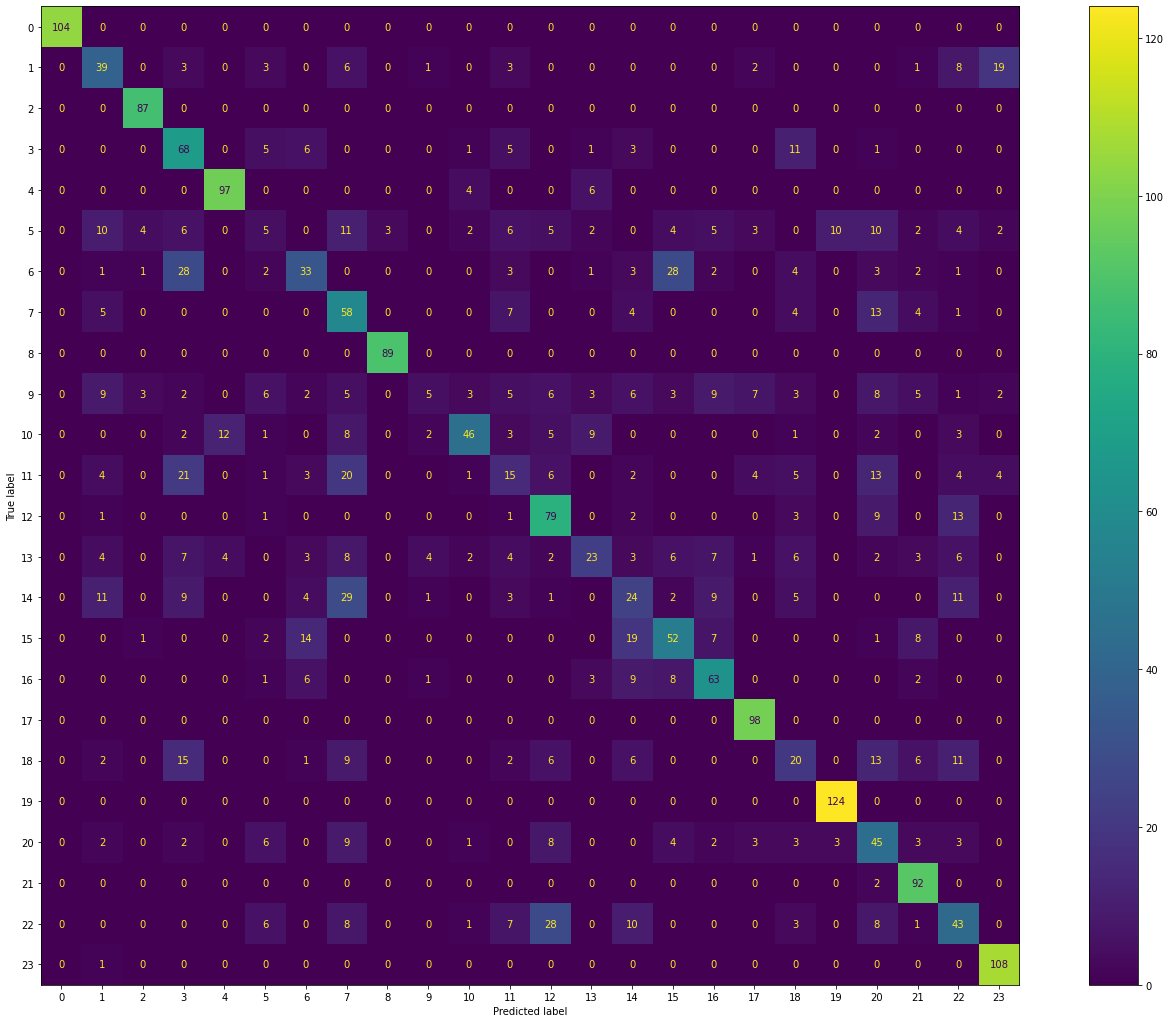

In [15]:
fig,ax = plt.subplots(figsize=(25,18))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=ax)
plt.show()

## Training the Random Forest model on the Training set

In [16]:
classifier = RandomForestClassifier(max_depth=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
accuracy_score(y_test, y_pred)

[[104   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  63   0   1   0   1   0   0   0   4   0   0   0   0   5   1   0   0
    1   0   0   0   4   5]
 [  0   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 107   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   2   0   0  65   4   1   2   7   1   0   0   3   0   1   1   1
    0   2   2   0   1   0]
 [  0   0   0   8   0   0  91   0   0   0   0   0   0   3   5   0   0   0
    5   0   0   0   0   0]
 [  0   0   0   0   0   0   0  96   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  89   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   4   0  13   0   0   0  53   0   0   1   7   1   5   2   0
    1   0   2   0

0.8645833333333334

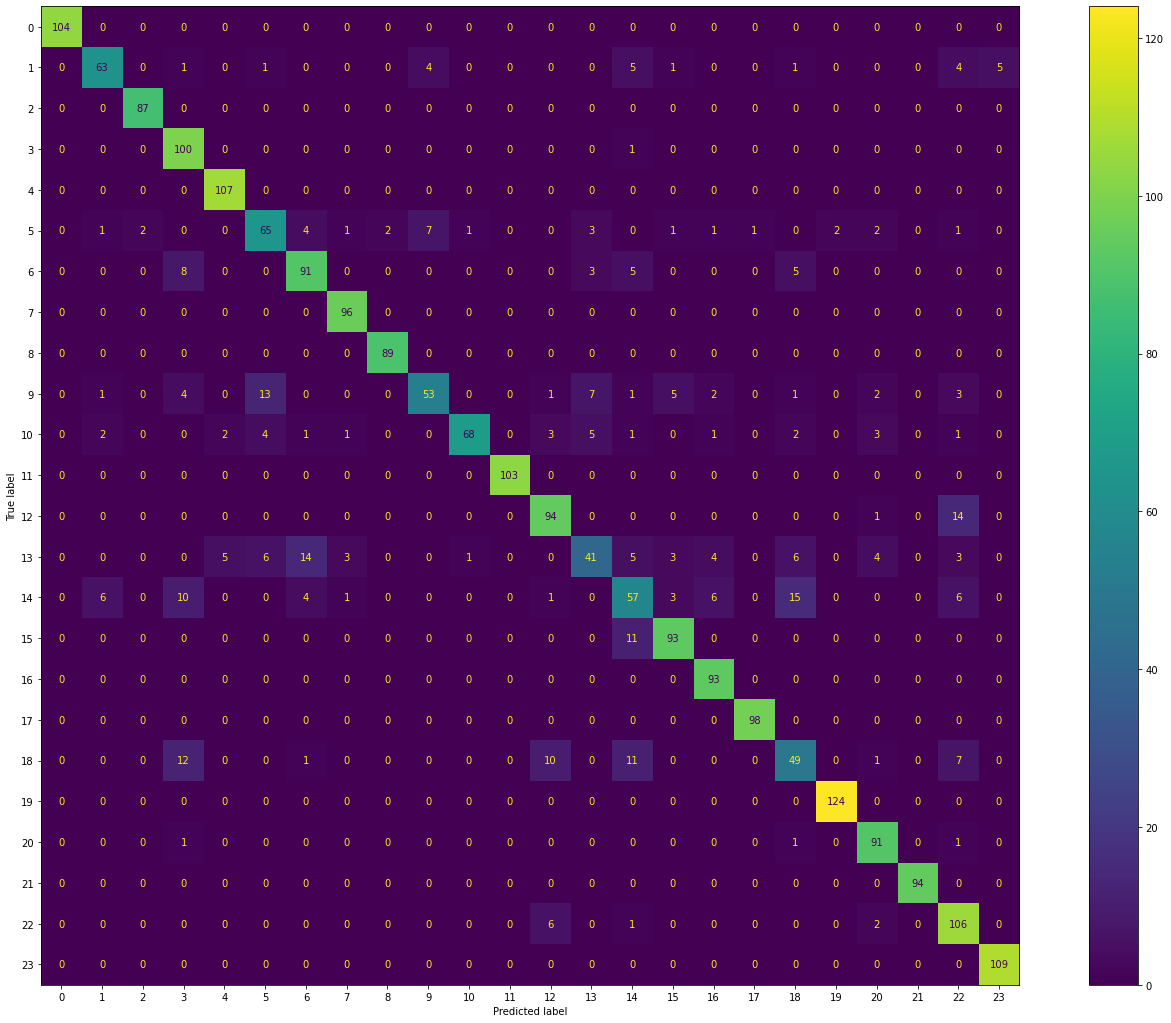

In [19]:
fig,ax = plt.subplots(figsize=(25,18))

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=ax)
plt.show()

## Training the MLP model on the Training set

In [20]:
classifier = MLPClassifier(random_state=42, max_iter=300)
classifier.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)
accuracy_score(y_test, y_pred)

[[104   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  59   0   1   0   3   0   0   0   5   0   0   2   1   7   0   0   0
    0   0   1   0   1   5]
 [  0   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  85   0   5   4   0   0   0   0   0   0   0   4   0   0   0
    1   0   2   0   0   0]
 [  0   0   0   0  87   1   0   0   0   0   9   0   0   9   0   1   0   0
    0   0   0   0   0   0]
 [  0   0   1   2   0  56   4   0   1   8   1   1   0   9   0   2   1   1
    0   4   2   0   1   0]
 [  0   0   0   8   0   1  76   0   0   0   1   1   0   8  10   5   0   0
    1   0   1   0   0   0]
 [  0   0   0   0   0   0   0  94   0   0   0   1   0   0   0   0   0   0
    1   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  88   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   4   0   3   0  18   1   1   0  38   2   1   1   5   1   5   6   0
    1   1   3   0

0.7770833333333333

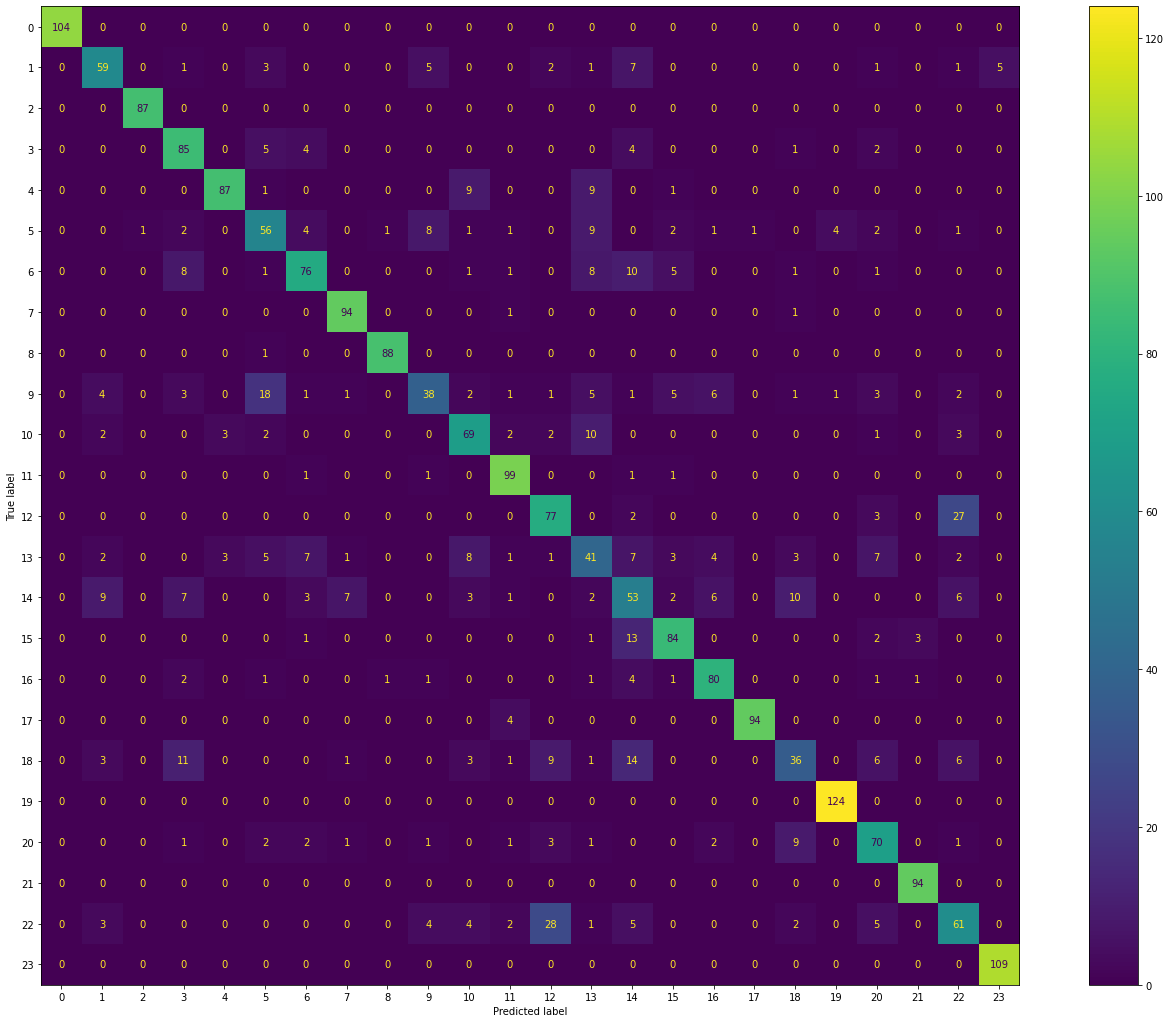

In [23]:
fig,ax = plt.subplots(figsize=(25,18))

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(ax=ax)
plt.show()

# Reference

1. Ragulin, A. (2022) Detecting DGA domains: Machine Learning approach www.underdefense.com.2022 [online]. Available from: https://underdefense.com/guides/detecting-dga-domains-machine-learning-approach/ [Accessed 15 May 2022].
